In [12]:
# Operaciones con vectores
import numpy as np
# Crear vectores

u = np.zeros(10)
i = np.zeros(10, dtype=np.int32)
a = np.ones(10)
r = np.random.rand(10) #nums aleatorios entre 0 y 1 con distribucion uniforme [0,1)

l = [1,2,3,4,5]
lnp = np.array(l)

linSpace = np.linspace(0.,100.,6) # Array con 6 elementos con valores interpolados entr 0 y 100

rang = np.arange(2, 6) # [2,3,4,5]


len(u) #Longitud
u.shape #Dimensiones Usar este

# Matrices
m = np.zeros((2, 3))

In [16]:
#Suma, multiplicacion por escalar, potenciacion, aplicar funcion a cada elemento
b = np.sin(a)

# Sacar un rango de valores de un array
c = b[1:5]
print(b, c)

[0.84147098 0.84147098 0.84147098 0.84147098 0.84147098 0.84147098
 0.84147098 0.84147098 0.84147098 0.84147098] [0.84147098 0.84147098 0.84147098 0.84147098]


In [40]:
# Calculo de la norma de un vector
# Dado x = [1,2,3,4]
# norma = sqrt(1^2, 2^2, 3^2, 4^2)

x = np.random.rand(100_000_000)


%time norma = (x**2).sum() ** .5
print(norma, "\n")

%time normaNP = x.dot(x) ** .5
print(normaNP)

%time normaNP2 = np.sqrt(x.dot(x))
print(normaNP2)


CPU times: total: 438 ms
Wall time: 463 ms
5773.253416653065 

CPU times: total: 188 ms
Wall time: 34.6 ms
5773.253416653049
CPU times: total: 141 ms
Wall time: 20.3 ms
5773.253416653049


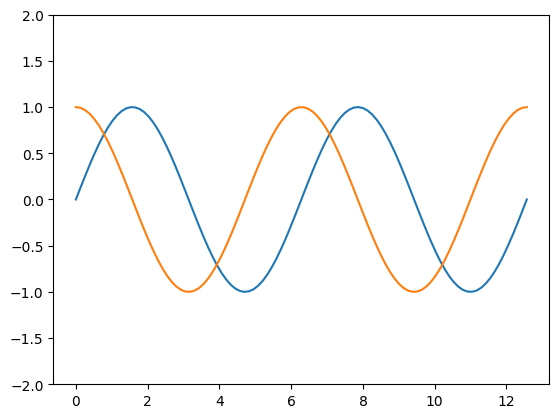

In [48]:
# MatPlotLib
import matplotlib as mp
import matplotlib.pyplot as plt

import numpy as np

x = np.linspace(0, 4 * np.pi, 100)

sin = plt.plot(x, np.sin(x), label="seno")
plt.ylim([-2,2])
plt.plot(x, np.cos(x), label="cos")

plt.show()

0

0

1

-oo

[-2/3]

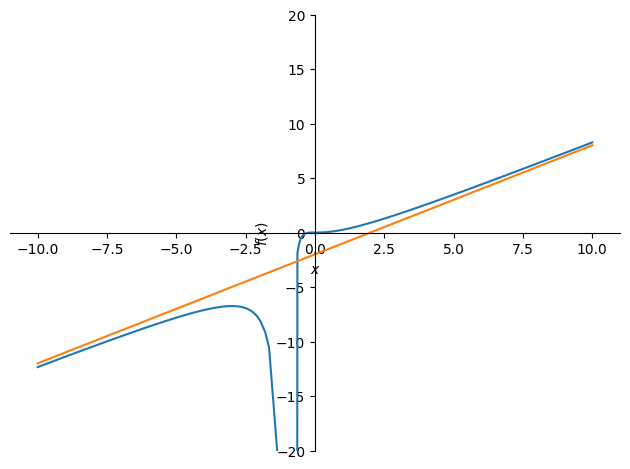

In [12]:
import sympy as sp
x = sp.Symbol('x', real=True)

f_ = (x**3)/((x+1)**2)
g_ = x - 2

f = sp.Lambda(x, f_)
g = sp.Lambda(x, g_)

display(sp.limit(f(x), x, 0))
display(sp.limit(f(x), x, 0, dir='-'))

display(sp.limit(f(x)/x, x, sp.oo))
display(sp.limit(f(x), x, -sp.oo))

display(sp.solve(f_-g_))

sp.plot(f(x), g(x), ylim=(-20,20))


25/4

6.25000000000000

6.313708498984761

<string>:1: RuntimeWarning: invalid value encountered in double_scalars


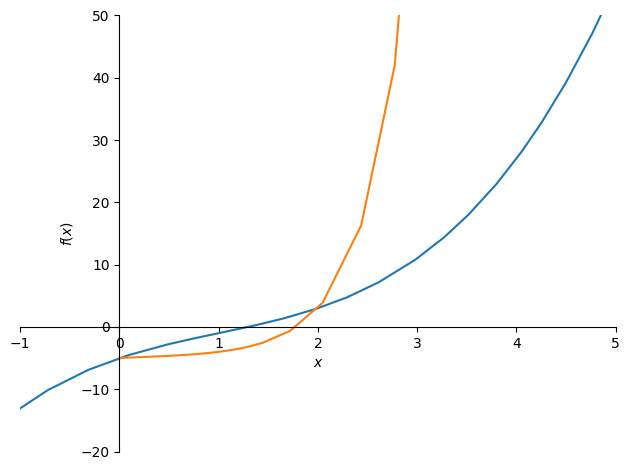

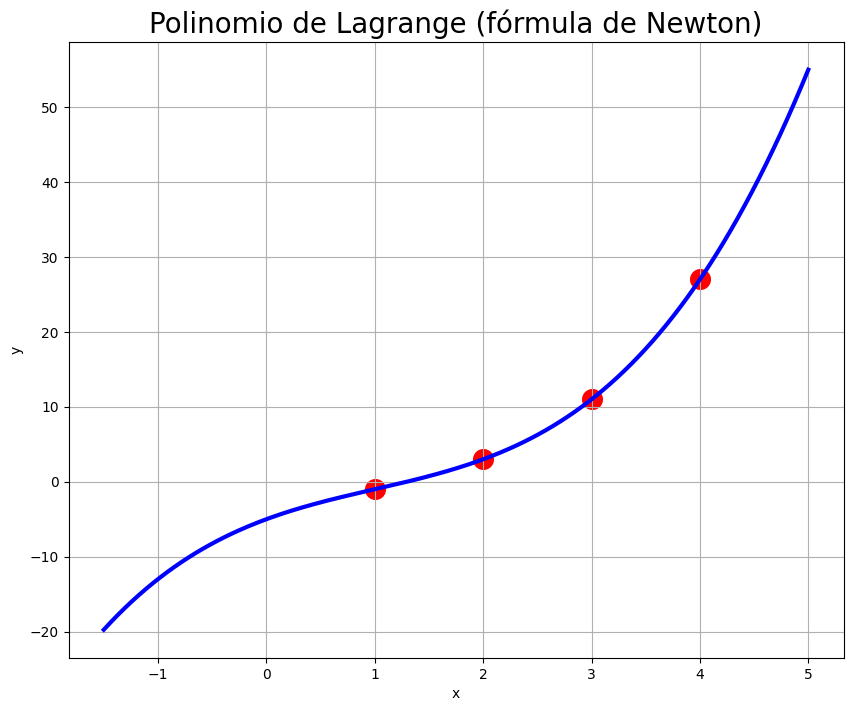

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def newton_poly(coef, x_data, x):
    # evaluamos el polinomio de Lagrange, construido con la 
    # tabla de diferencias divididas, en el punto x
    # in: 
    #    coef ---> primera fila de la tabla de diferencias divididas
    #    x_data -> valores de x_i
    #    x ------> punto en el que queremos evaluar el polinomio 
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x_coef = [1,2,3,4]
y_coef = [-1,3,11,27]

x= np.linspace(-1.5, 5, 200)

n = len(x_coef)
coef = np.zeros([n, n])
# La primera columna serán los datos en y
coef[:,0] = y_coef

# Necesitamos un doble bucle para crear la matriz (perdón, tabla) de diferencias divididas
for j in range(1,n):
    for i in range(n-j):
        coef[i,j] = (coef[i+1,j-1] - coef[i,j-1]) / (x_coef[i+j]-x_coef[i])

# display(coef)

# evaluamos el polinomio según la function definida al principio
P_expr = newton_poly(coef[0,:],x_coef,x)

varx = sp.symbols('x', real=True)

f_ = newton_poly(coef[0,:],x_coef,varx)
# display(f_.simplify().expand())

g_ = -1+4*(varx-1)+2*(varx-1)*(varx-2) + sp.Rational('2/3')*(varx-1)*(varx-2)*(varx-3)
# display(g_.simplify().expand())

f = sp.Lambda(varx, f_)
g = sp.Lambda(varx, g_)

display(g(sp.Rational('5/2')))
display(g(5/2))
display(2**(5/2 + 1)-5)


sp.plot(f(varx), (varx**(varx+1))-5, xlim=(-1, 5), ylim=(-20, 50))

# dibujamos el resultado
fig = plt.figure(figsize = (10,8))
plt.scatter(x_coef, y_coef, s=200, c='r')
plt.plot(x, P_expr, 'b', lw='3')
plt.title('Polinomio de Lagrange (fórmula de Newton)', fontsize=20)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
import sympy as sp

x = sp.symbols('x', real=True)


g_ = -1+4*(varx-1)+2*(varx-1)*(varx-2) + sp.Rational('2/3')*(varx-1)*(varx-2)*(varx-3)
